# Sales Data Analysis and Visualization

**Developed by Keshav Nivrutti Yawale**

## Problem Statement
The company aims to improve its profitability by identifying key factors influencing sales performance, losses, and customer satisfaction. By analyzing the sales data, the company seeks to uncover hidden patterns and trends that can help optimize shipping, product sales, and target marketing efforts to different regions, customer segments, and product categories.

## Objective

The primary objective of this project is to :

Explore the dataset to identify trends and insights about sales, shipping methods, and customer segments.
Understand the relationship between sales, product categories, and customer segments.
Highlight regions and product categories that are underperforming and contributing to lower profitability.
Provide actionable recommendations to increase profit margins while reducing potential losses from operational inefficiencies or customer dissatisfaction.

## Key Deliverables
Data Cleaning and Preparation:

- Handle missing values, outliers, and ensure data integrity.
- Standardize formats (e.g., categorical variables) for easy analysis.

Exploratory Data Analysis (EDA):

- Analyze overall sales performance and trends across different dimensions such as product category, sub-category, region, and customer segment.
- Visualize key metrics like total sales, number of shipments, and profit across different customer segments and regions.

Profitability Analysis:

- Perform an analysis to identify which product categories, shipping modes, and regions drive higher profits and losses.
- Create visualizations to compare sales performance across categories and regions.

Customer Segment Analysis:

- Analyze customer segments to identify profitable segments and segments that need more marketing focus.
- Examine which customer segment generates the most revenue and which segments are prone to higher operational costs.

Shipping Mode and Delivery Analysis:

- Evaluate the efficiency of shipping modes, identifying which modes are more cost-effective and have faster delivery times.
- Provide recommendations to optimize shipping methods and reduce costs while maintaining customer satisfaction.

Interactive Dashboards:

- Develop visualizations and dashboards using tools like Tableau or Power BI to monitor sales performance.
- Provide interactive filters for stakeholders to drill down into regions, customer segments, product categories, and shipping methods.

Actionable Insights:

- Provide recommendations for optimizing product assortment, pricing, and shipment methods based on the analysis.
- Propose strategies for boosting profits in underperforming regions and product categories.

## Summary of the Dataset

This dataset, simulating a superstore's sales data, contains detailed information about sales transactions, customer segments, product categories, and shipment methods. Key features include :

- Ship Mode: Describes the shipment method used (Standard, Express, etc.).
- Segment: The type of customer (Consumer, Corporate, Home Office).
- Country, City, State, Postal Code: Geographic information about the location where the shipment was delivered.
- Region: Country regions (like West, East, Central) to identify regional sales trends.
- Category & Sub-Category: Product categories and sub-categories (like Furniture, Technology, Office Supplies).
- Sales: The amount of revenue generated from each transaction in USD.

## Data wrangling

### (i) Data gathering

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('SampleSuperstore.csv')

In [35]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [36]:
df.shape

(9994, 13)

### (ii) Data Accessing

## Issues with the dataset

### Quality-Related Issues:

(i) Postal Code (Data Type)

- The Postal Code column is stored as an integer (int64). Postal codes are not typically numeric values for calculations, and leading zeros might be important. This column should be treated as a string (object).

(ii) Discount and Profit (Negative Profit Values)

- Some entries in the Profit column show negative values, indicating losses. While this might be valid, it's worth checking if those cases are consistent with high Discount percentages to ensure no data entry errors.

(iii) Missing or Misleading Country Values

- The Country column contains only "United States." If this dataset is intended to represent more countries, data might be incomplete or misleading.

(iv) High Discount Impact on Profit

- Several entries show high Discount values (like 0.45 or more). These should be examined to see if they are reasonable, as they can cause heavy losses (negative profits).

### Structural Issues:

(i) Redundant Country Column

- Since all entries in the Country column are "United States," it may not provide useful insights for analysis and could be considered redundant.

(ii) Categorical Data (Ship Mode, Segment, Category, Sub-Category, Region)

- Several columns such as Ship Mode, Segment, and Region are categorical but stored as object. They could be encoded for more efficient analysis.

(iii) Potential Duplicates

- There may be duplicates in rows where all features, such as Ship Mode, Segment, and Sales, are identical. A check for duplicates might be needed.



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


- The Postal Code column is stored as an integer (int64). Postal codes are not typically numeric values for calculations, and leading zeros might be important. This column should be treated as a string (object).

In [38]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [39]:
df.duplicated().sum()

17

- We have to drop these redundant or duplicate records

In [40]:
df.drop_duplicates(inplace = True)

In [41]:
df.duplicated().sum()

0

In [42]:
# there are no duplicate data in our dataset

In [43]:
df.sample(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
8760,Standard Class,Home Office,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,1270.990,1,0.0,635.4950
6041,Standard Class,Corporate,United States,Los Angeles,California,90008,West,Technology,Machines,506.280,3,0.2,177.1980
2427,Standard Class,Corporate,United States,Arlington,Texas,76017,Central,Office Supplies,Binders,1.344,4,0.8,-2.1504
6027,Standard Class,Corporate,United States,Seattle,Washington,98115,West,Technology,Phones,71.960,5,0.2,25.1860


In [44]:
df.nunique()

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


In [45]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


### (iii) Data Cleaning

(i) Postal Code (Data Type)
- The Postal Code column was converted from integer (int64) to string (object) to preserve leading zeros.

In [46]:
df1=df.copy()

In [47]:
df['Postal Code'] = df['Postal Code'].astype(str)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


(ii) Investigating High Discount and Negative Profit
- Checked for entries where Discount is greater than or equal to 0.45 and Profit is negative.

In [49]:
high_discount_negative_profit = df[(df['Discount'] >= 0.45) & (df['Profit'] < 0)]
high_discount_negative_profit


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Binders,9.6180,2,0.70,-7.0532
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,First Class,Corporate,United States,Mason,Ohio,45040,East,Office Supplies,Binders,22.4280,3,0.70,-17.9424
9877,First Class,Home Office,United States,Cleveland,Ohio,44105,East,Office Supplies,Binders,8.7000,5,0.70,-6.3800
9903,Standard Class,Consumer,United States,Carrollton,Texas,75007,Central,Furniture,Furnishings,25.1280,3,0.60,-6.9102
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176


- The fact that there are 932 entries with high discount (≥ 45%) and negative profit suggests that offering high discounts is leading to significant losses for the business.

(iii) Remove Redundant Country Column
- The Country column, which only contained "United States".

In [50]:
df = df.drop(columns=['Country'])


In [51]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


(iv) Categorical Data (Ship Mode, Segment, Category, Sub-Category, Region)

- Several columns such as Ship Mode, Segment, and Region are categorical but stored as object. They could be encoded for more efficient analysis.

In [52]:
# Converting columns to categorical data types to optimize memory and ensure proper analysis
categorical_columns = ['Ship Mode', 'Segment', 'Category', 'Sub-Category', 'Region']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9977 non-null   category
 1   Segment       9977 non-null   category
 2   City          9977 non-null   object  
 3   State         9977 non-null   object  
 4   Postal Code   9977 non-null   object  
 5   Region        9977 non-null   category
 6   Category      9977 non-null   category
 7   Sub-Category  9977 non-null   category
 8   Sales         9977 non-null   float64 
 9   Quantity      9977 non-null   int64   
 10  Discount      9977 non-null   float64 
 11  Profit        9977 non-null   float64 
dtypes: category(5), float64(3), int64(1), object(3)
memory usage: 673.6+ KB


In [54]:
df.sample(4)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
5296,Standard Class,Consumer,Yonkers,New York,10701,East,Furniture,Furnishings,14.890,1,0.0,4.0203
2043,Standard Class,Corporate,Lakewood,Ohio,44107,East,Office Supplies,Art,38.864,7,0.2,7.7728
8419,First Class,Home Office,Seattle,Washington,98105,West,Office Supplies,Storage,66.960,4,0.0,2.6784
4053,Standard Class,Corporate,Philadelphia,Pennsylvania,19134,East,Office Supplies,Labels,55.440,11,0.2,18.0180


In [55]:
# Saving the cleaned dataset
cleaned_file_path = 'Cleaned_SampleSuperstore.csv'
df.to_csv(cleaned_file_path, index=False)


In [56]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


###  Column Types :
- Numerical - Sales,Quantity,Discount,Profit.
- Categorical - Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category.


# Univariate Analysis

In [57]:
#Correlation Between Variables.
df[['Sales','Quantity','Discount','Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


- Sales and Profit (0.479): There is a moderate positive correlation between Sales and Profit, indicating that as sales increase, profit generally increases as well. However, this is not a perfect relationship, suggesting other factors (e.g., discount levels) may influence profit margins.

- Quantity and Sales (0.201): The correlation between Quantity and Sales is weak but positive, meaning more items sold are associated with higher sales, though not strongly.

- Discount and Profit (-0.220): There is a weak negative correlation between Discount and Profit, implying that higher discounts tend to reduce profitability, the effect is not very strong.

- Discount and Sales (-0.028): The correlation between Discount and Sales is almost negligible, meaning that higher discounts do not have a significant direct impact on sales volume.

## Numerical columns

## Sales

### Conclusions :
- Most sales are low, there are significant outliers with very high values.
- The skewness value of 12.96 indicates a highly right-skewed distribution in the sales data.
- Doller 230.15 indicates that, for most transactions, sales are modest. However, the occurrence of some transactions that exceed 22,638.48 suggests there are exceptional cases that could be critical for business analysis, such as large contracts or bulk orders.

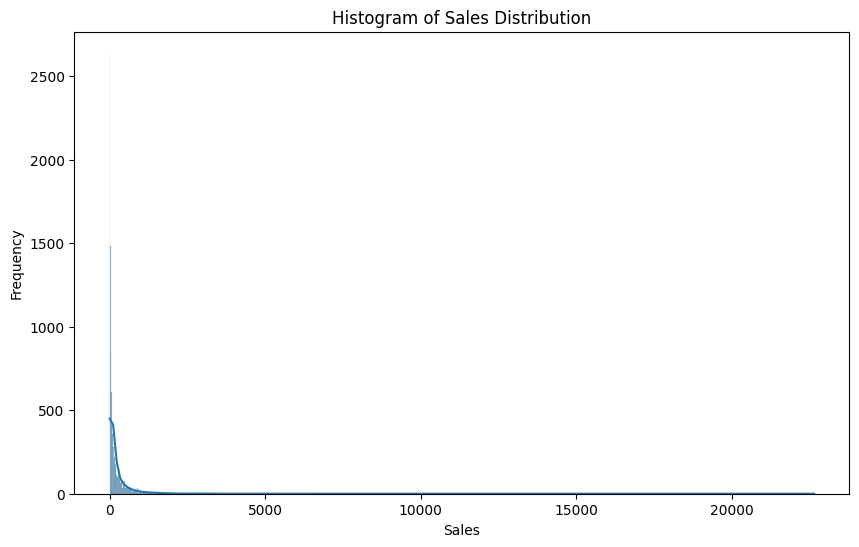

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'],  kde=True)
plt.title('Histogram of Sales Distribution')
plt.xlabel('Sales')  # Title for x-axis
plt.ylabel('Frequency')  # Title for y-axis

# Show the plot
plt.show()

<Axes: ylabel='Frequency'>

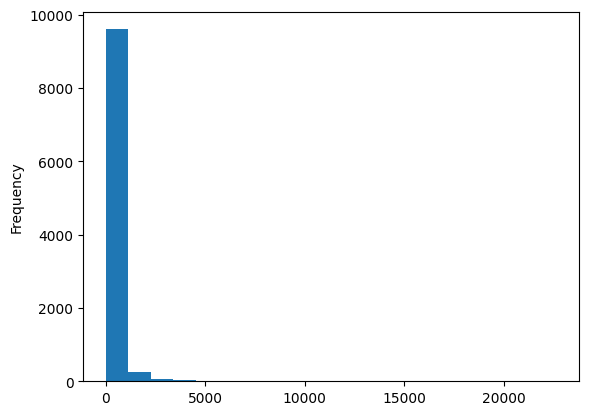

In [59]:
df['Sales'].plot(kind='hist',bins=20)

In [60]:
df['Sales'].skew()

12.963770331688096

The skewness value of 12.96 indicates a highly right-skewed distribution in the sales data, suggesting that while most sales are low, there are significant outliers with very high values. This skewness can distort the mean, making it unrepresentative of the data.

In [61]:
df['Sales'].mean()

230.14890150345792

In [62]:
df['Sales'].median()

54.816

In [63]:
df['Sales'].max()

22638.48

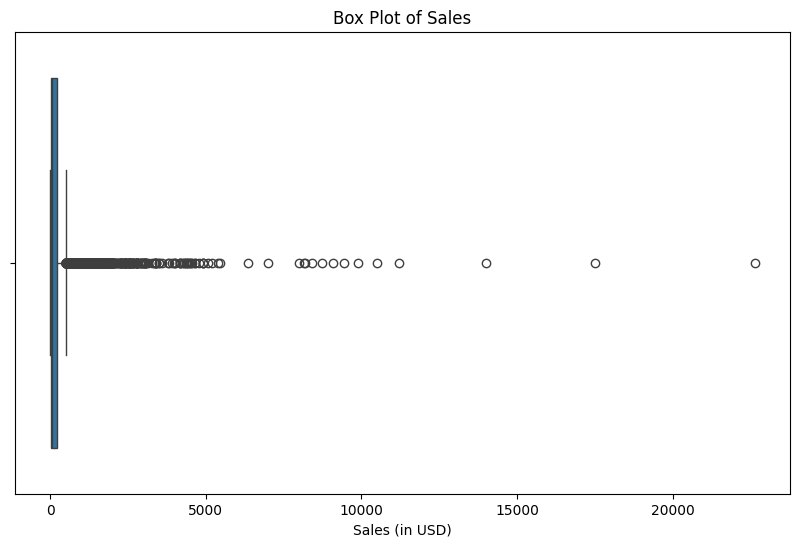

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales', data=df)
plt.title('Box Plot of Sales')
plt.xlabel('Sales (in USD)')
plt.show()

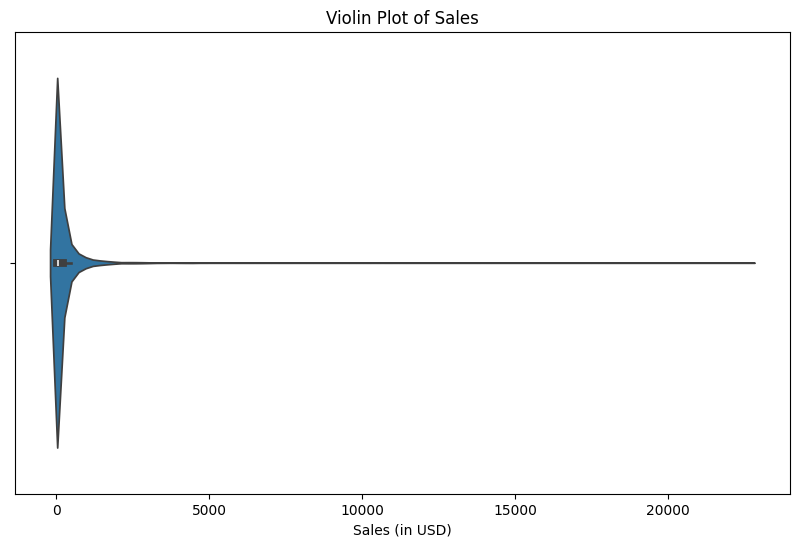

In [65]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sales', data=df)
plt.title('Violin Plot of Sales')
plt.xlabel('Sales (in USD)')
plt.show()

## Quantity

### Conclusions :

- The maximum ordered quantity is 14, the median is 3, and the data is right-skewed. Most of the order quantities are between 2 and 5.

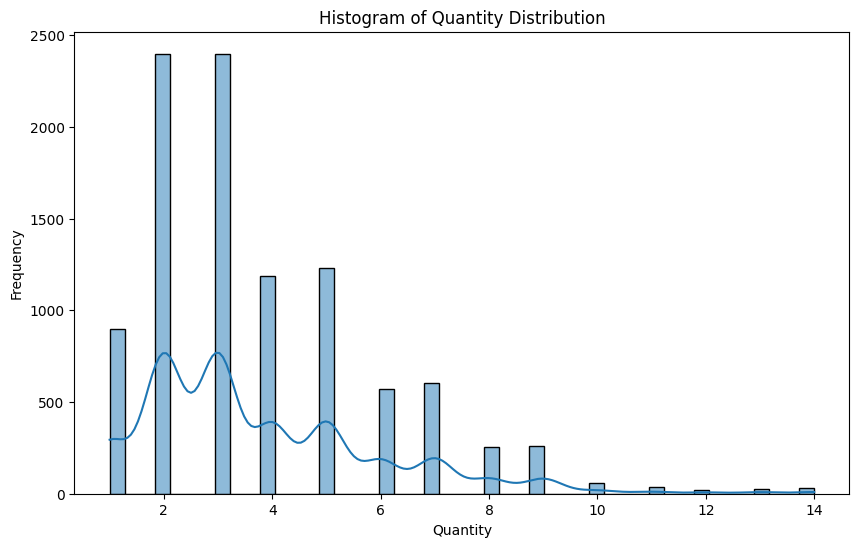

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'],  kde=True)
plt.title('Histogram of Quantity Distribution')
plt.xlabel('Quantity')  # Title for x-axis
plt.ylabel('Frequency')  # Title for y-axis

# Show the plot
plt.show()

In [67]:
df['Quantity'].skew()

1.2767090217045116

In [68]:
df['Quantity'].mean()

3.7907186529016736

In [69]:
df['Quantity'].median()

3.0

In [70]:
df['Quantity'].max()

14

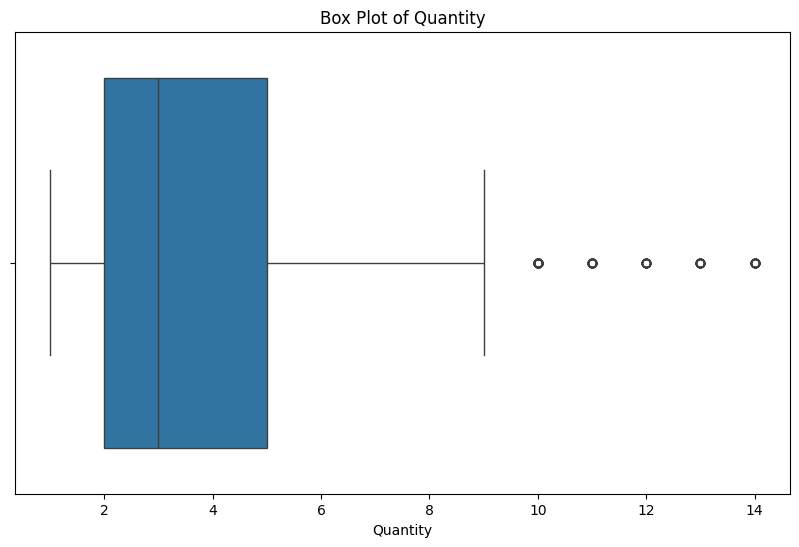

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quantity', data=df)
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')
plt.show()

## Discount

### Conclusions :

- The maximum discount given is 0.8 , the median is 0.2 , and the data is right-skewed.

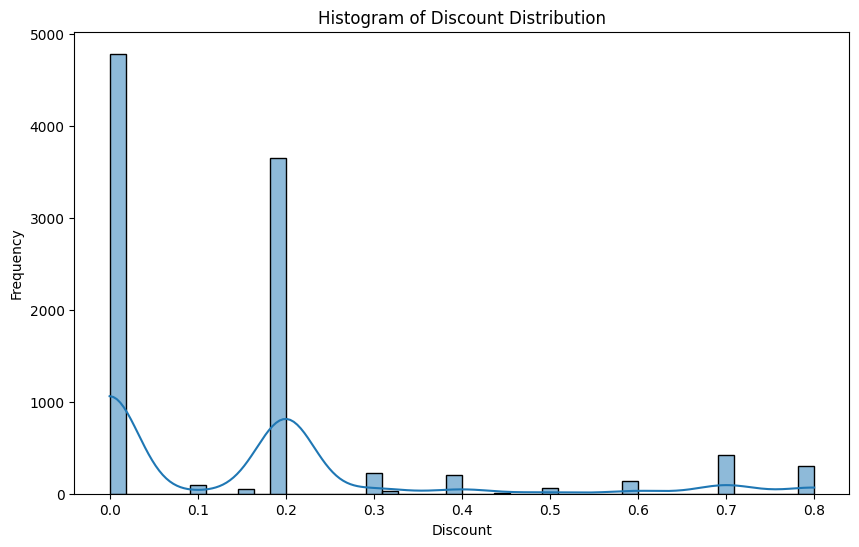

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'],  kde=True)
plt.title('Histogram of Discount Distribution')
plt.xlabel('Discount')  # Title for x-axis
plt.ylabel('Frequency')  # Title for y-axis

# Show the plot
plt.show()

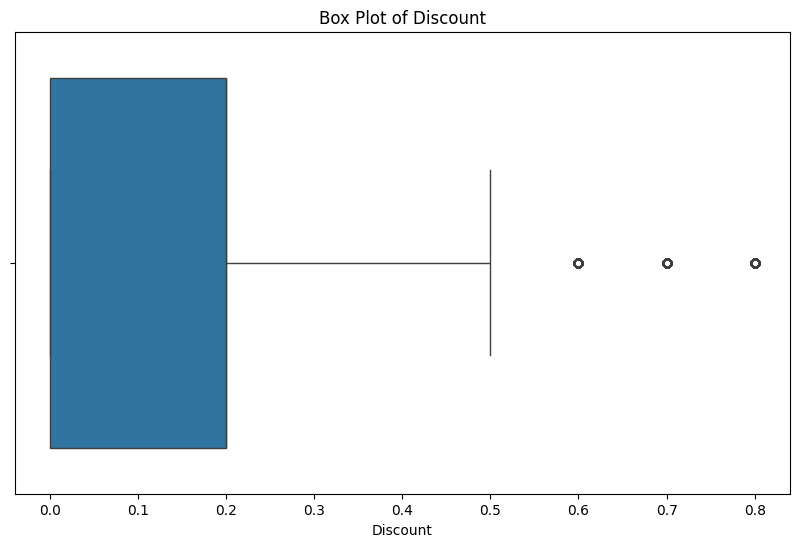

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount', data=df)
plt.title('Box Plot of Discount')
plt.xlabel('Discount')
plt.show()

In [74]:
df['Discount'].skew()

1.6833855854562163

In [75]:
df['Discount'].median()

0.2

In [76]:
df['Discount'].mean()

0.1562784404129498

In [77]:
df['Discount'].max()

0.8

## Profit

### Conclusions :

- There were 8043 instances or transactions where the company has earned profit (greater than 0).
- There were 1934 instances or transactions where the company has gained losses (less than 0).
- only 20 instances where profit was earned greater than 1500
- Total profit earned by company is 286241.42 USD

<Axes: ylabel='Frequency'>

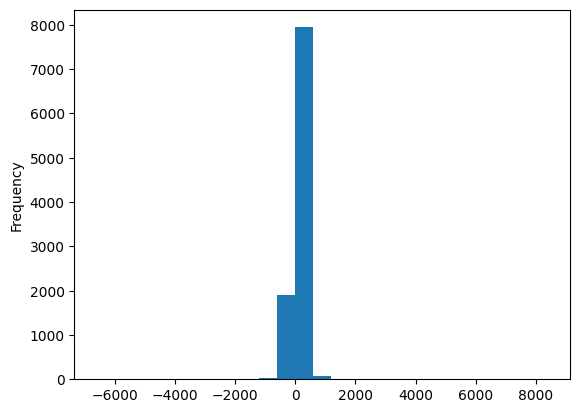

In [78]:
df['Profit'].plot(kind='hist',bins=25)

In [79]:
len(df[df['Profit']>0])
# There were 8043 instances or transactions where the company has earned profit (greater than 0).

8043

In [80]:
len(df)-len(df[df['Profit']>0])
# There were 1934 instances or transactions where the company has gained losses (less than 0).

1934

In [81]:
len(df[df['Profit']>=1500])

20

In [82]:
len(df[df['Profit']<=-1000])

22

In [83]:
df['Profit'].median()

8.671

In [84]:
df['Profit'].sum()
# Total profit earned by company is 286241.42 USD

286241.4226

## Categorical columns

## Ship Mode

### Conclusions :

- Most shipment method used was Standard Class 59.7%

In [85]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


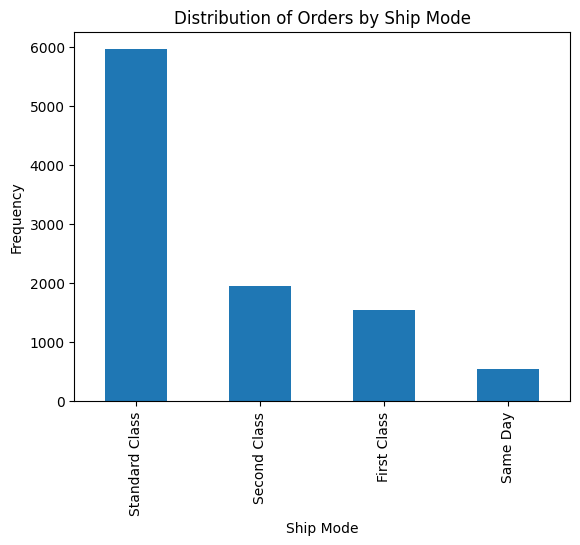

In [86]:
df['Ship Mode'].value_counts().plot(kind='bar')
plt.title('Distribution of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='count'>

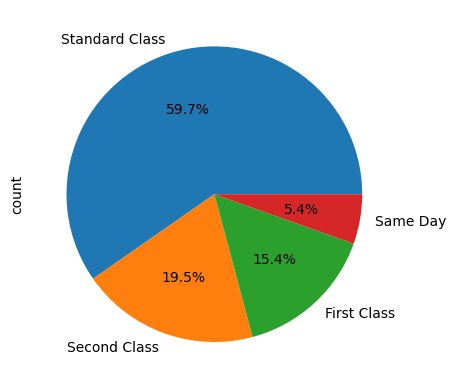

In [87]:
df['Ship Mode'].value_counts().plot(kind='pie',autopct='%0.1f%%')

## Segment

### Conclusions :

- We have 3 type of segment which are Consumer, Corporate, Home Office.
- We have 51.9 % Consumer , 30.2 % Corporate , 17.8 % Home Office.

In [88]:
df['Segment'].value_counts()

,count
Segment,
Consumer,5183
Corporate,3015
Home Office,1779


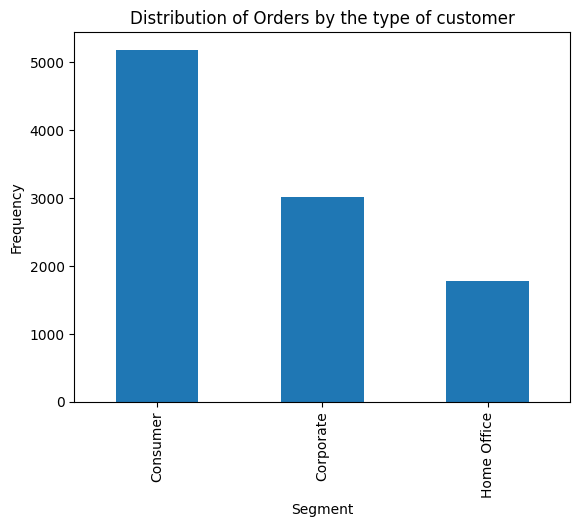

In [89]:
df['Segment'].value_counts().plot(kind='bar')
plt.title('Distribution of Orders by the type of customer')
plt.xlabel('Segment')
plt.ylabel('Frequency')
plt.show()

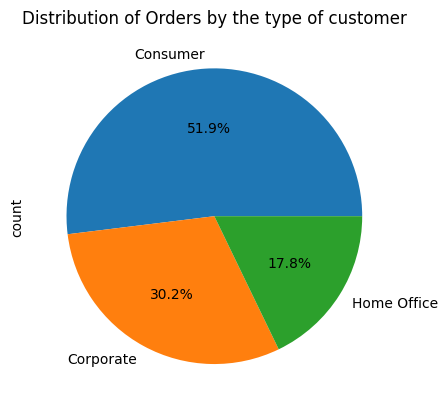

In [90]:
df['Segment'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of Orders by the type of customer')
plt.show()

## City

### Conclusions :
- New York City has the highest number of orders at 914, followed by Los Angeles with 746, and Philadelphia with 536. These three cities represent the largest customer bases.


In [91]:
df['City'].value_counts()

,count
City,
New York City,914
Los Angeles,746
Philadelphia,536
San Francisco,506
Seattle,424
...,...
Glenview,1
Missouri City,1
Rochester Hills,1


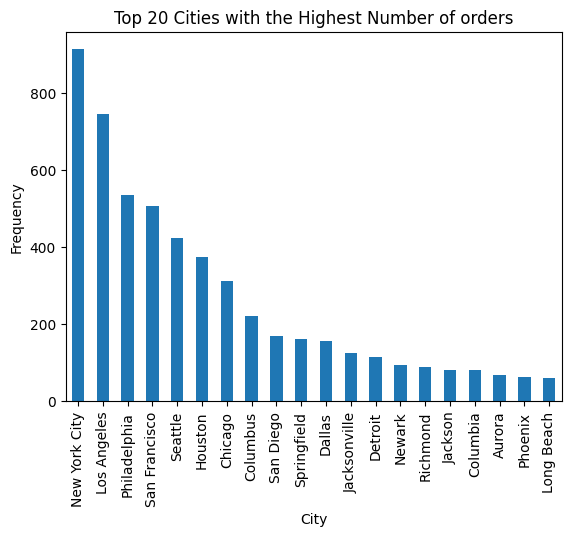

In [92]:
df['City'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Cities with the Highest Number of orders')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

## State

### conclusion :

- California has the highest number of orders at 1,996, followed by New York with 1,127, Texas with 983, Pennsylvania with 586, and Washington with 502. These states represent the largest customer bases.

In [93]:
df['State'].value_counts()

,count
State,
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254


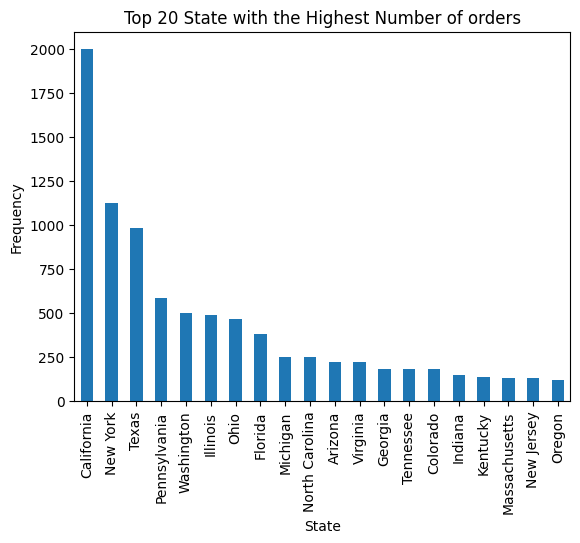

In [94]:
df['State'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 State with the Highest Number of orders')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

## Region

### Conclusion :

- The West region accounts for 32% of the orders, followed by the East region with 28.5%, the Central region with 23.2%, and the South region with 16.2%.

In [95]:
df['Region'].value_counts()

,count
Region,
West,3193
East,2845
Central,2319
South,1620


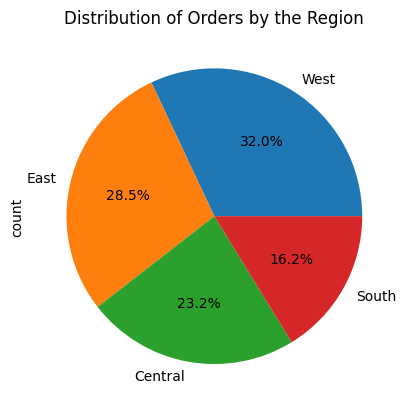

In [96]:
df['Region'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of Orders by the Region')
plt.show()

## Category

### conclusion :

- In the analysis of product sales, Office Supplies leads with 6,012 units sold, representing approximately 61.2% of total sales. Furniture follows with 2,118 units, making up about 21.1%, while Technology accounts for 1,847 units sold, which is roughly 18.7%.

- This data highlights the dominance of Office Supplies in the overall sales figures.

In [97]:
df['Category'].value_counts()

,count
Category,
Office Supplies,6012
Furniture,2118
Technology,1847


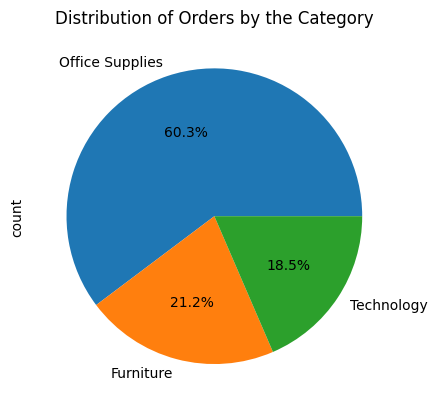

In [98]:
df['Category'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Distribution of Orders by the Category')
plt.show()

## Sub-Category

### Conclusion :

- Binders lead with 1,522 units sold, followed by Paper with 1,359 units. Furnishings account for 956 units, while Phones total 889 units sold. Additionally, Storage sales reach 846 units, with Art at 795 units and Accessories at 775 units.
- This data highlights the strong performance of Binders and Paper among the sub-categories.

In [99]:
df['Sub-Category'].value_counts()

,count
Sub-Category,
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466


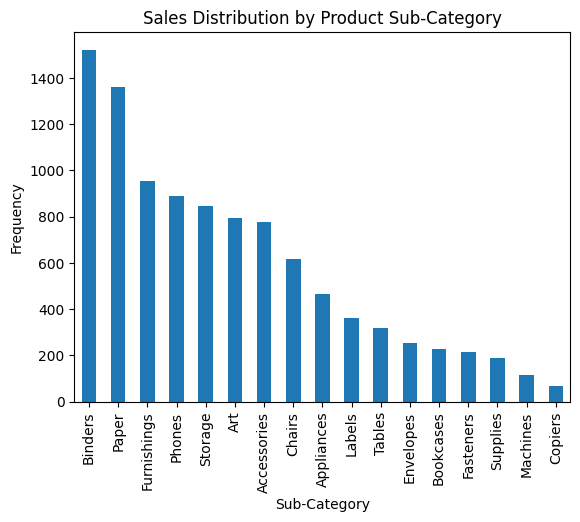

In [100]:
df['Sub-Category'].value_counts().head(20).plot(kind='bar')
plt.title('Sales Distribution by Product Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis

## Sales by Sub-Category

### Conclusion :
- Machines and Copiers lead in sales, exceeding 20,000 and 15,000 usd respectively.
- Categories like Art, Fasteners, Paper, and Labels have the lowest sales, indicating areas where focus and improvement may be needed.

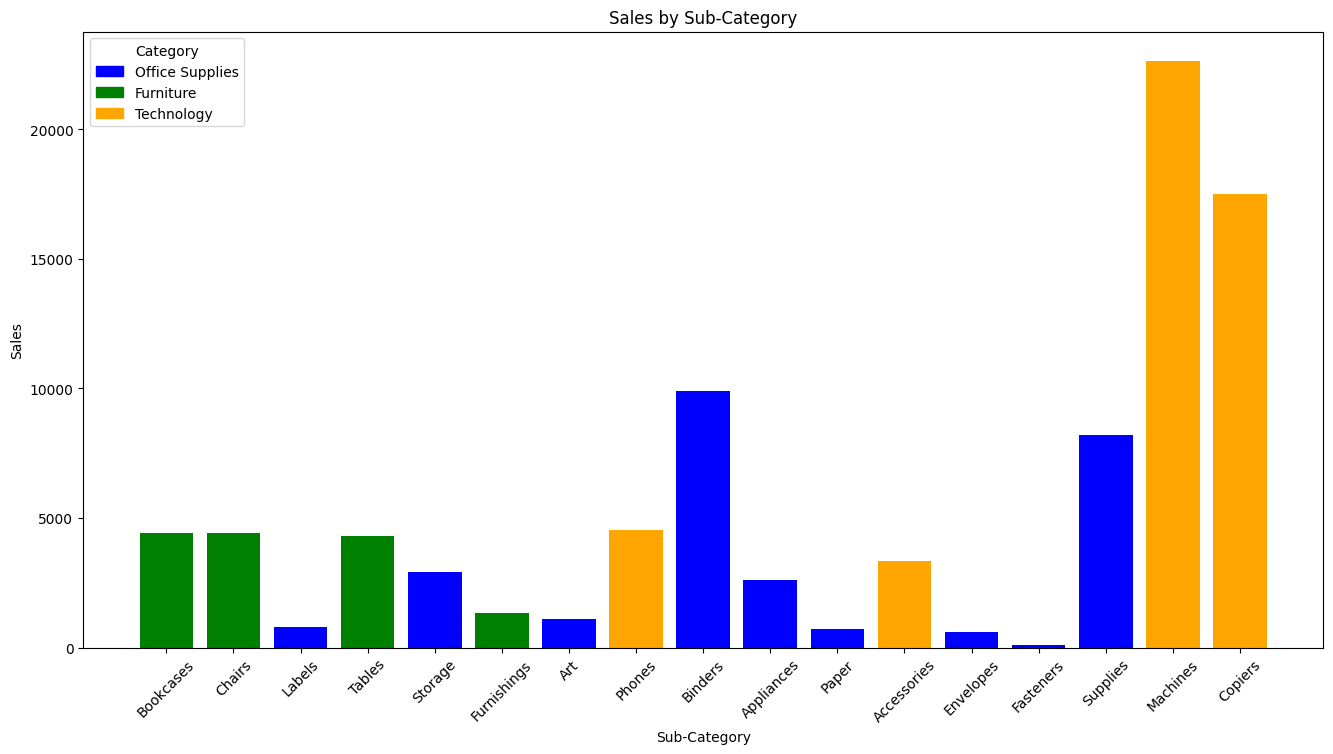

In [101]:
category_colors = {
    'Office Supplies': 'blue',
    'Furniture': 'green',
    'Technology': 'orange'
}

# Create a list of colors for each sub-category based on its category
colors = df['Category'].map(category_colors)

# Create the bar plot with colored bars based on the Category
plt.figure(figsize=(16,8))
plt.bar(df['Sub-Category'], df['Sales'], color=colors)
plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)

# Create a legend for categories
handles = [plt.Rectangle((0,0),1,1, color=category_colors[cat]) for cat in category_colors]
labels = list(category_colors.keys())
plt.legend(handles, labels, title='Category')

plt.show()

## Pair Plot of Numerical Variables

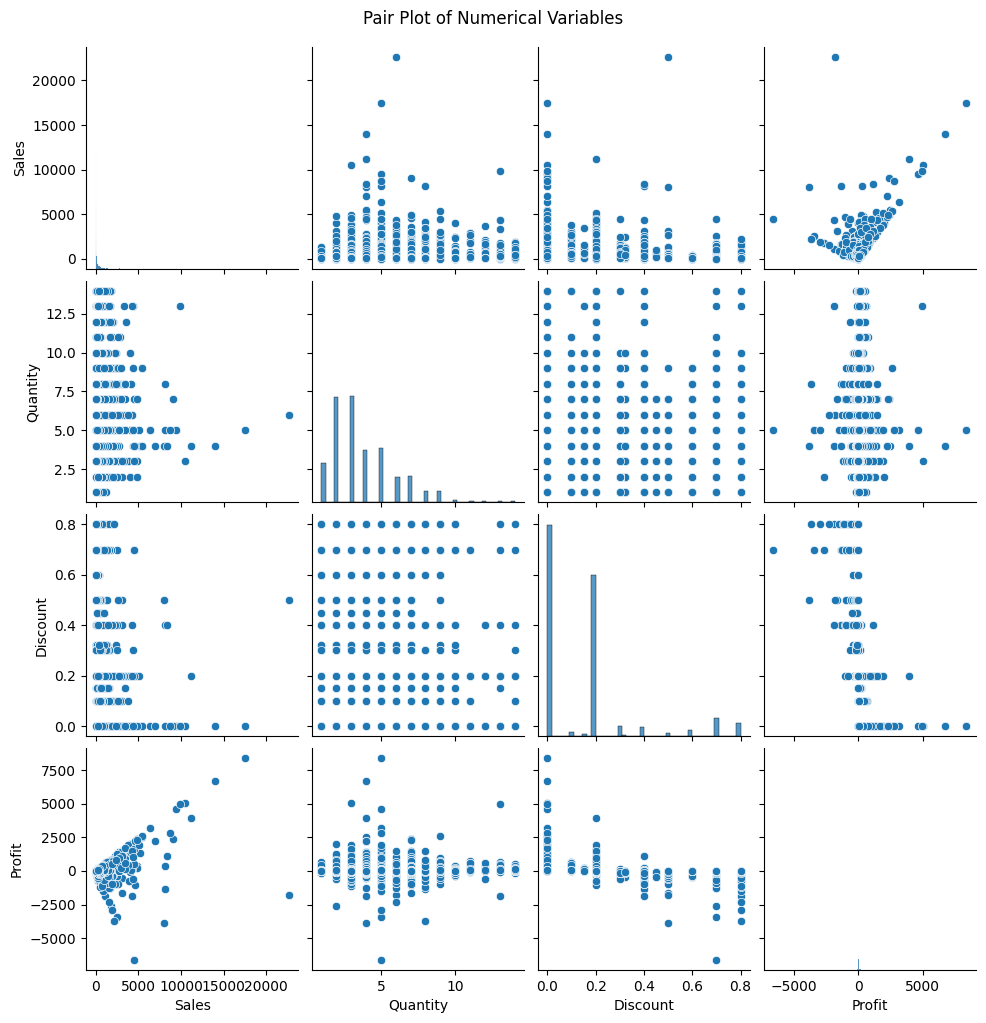

In [102]:
sns.pairplot(df)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

### Sales vs Profit:

- A clear positive correlation is observed. Higher sales tend to result in higher profits.
- However, a few points show high sales with negative profit, indicating potential issues like high discounts or loss-making transactions.

### Quantity vs Profit:

- No strong correlation. Increasing the quantity doesn't consistently increase profit, indicating that bulk sales don’t necessarily lead to higher profitability.

### Discount vs Profit:

- A weak negative relationship. As discount increases, profits generally tend to decrease, which makes sense as higher discounts cut into margins.

### Sales Distribution:

- The sales distribution is highly skewed to the right, indicating that most transactions are of low sales value, with a few high-value outliers.

### Quantity Distribution:

- The majority of the quantity sold is between 1 to 5 units, with very few instances of large quantities.

### Discount Distribution:

- Discount values seem concentrated at specific levels (0%, 10%, 20%, etc.), indicating possible discount tiers applied in sales.

### Profit Distribution:

- The profit distribution shows both positive and negative values, with more points on the positive side but a noticeable number of negative profit transactions.

## Correlation Heatmap of Numerical Variables

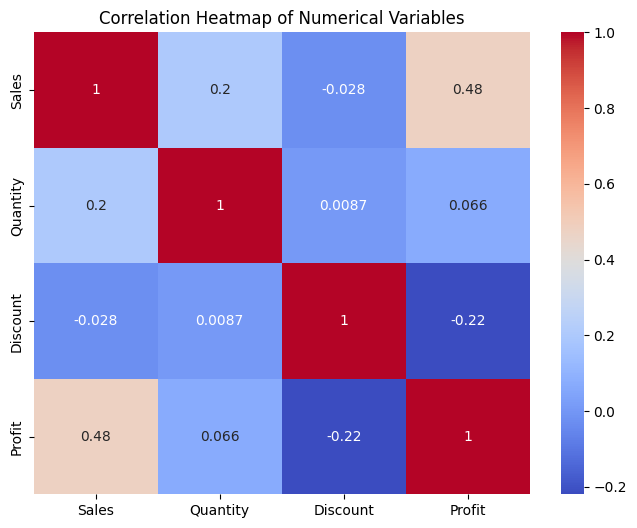

In [103]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Profit vs. Discount

### conclusion :

- Offering discounts greater than 20% is associated with generating losses, indicating a need for careful pricing strategies. - - Ideally, discounts should remain between 0% and 10% to maintain profitability.
- This suggests that while discounts can attract customers, excessive reductions may compromise financial health.
- Businesses should consider optimizing their discount strategies to enhance sales without sacrificing profit margins.

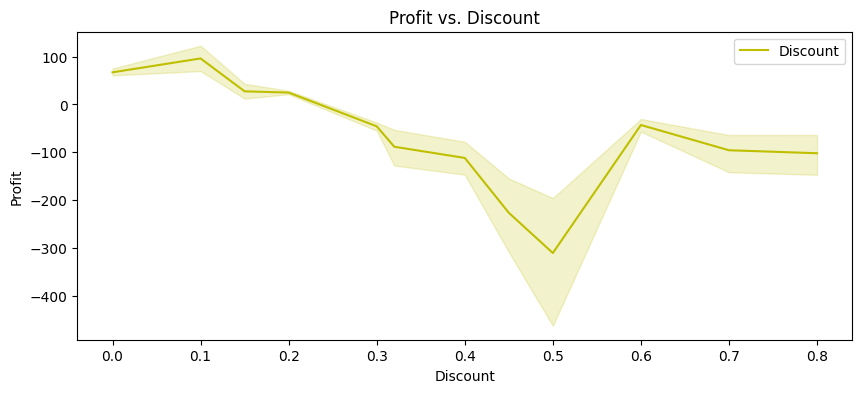

In [104]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Profit', data=df, color='y', label='Discount')
plt.legend()
plt.title('Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## Sales vs. Discount

### Conclusion :

- Moderate Discounts (0.1 - 0.2): Sales remain relatively steady and do not show a major dip. Discounts in this range seem to maintain sales volume effectively.

- Higher Discounts (0.5): A significant spike in sales occurs around the 50% discount mark, indicating that higher discounts lead to a sharp increase in sales, potentially due to customer incentive.

- Deep Discounts (0.6 and above): After the 50% discount point, sales sharply decline despite the higher discount levels. This may indicate that extremely high discounts are not yielding the expected increase in sales.

- No Discount (0): Sales are relatively low when there is no discount, suggesting that discounts play a role in driving customer purchases but discount should be moderate.

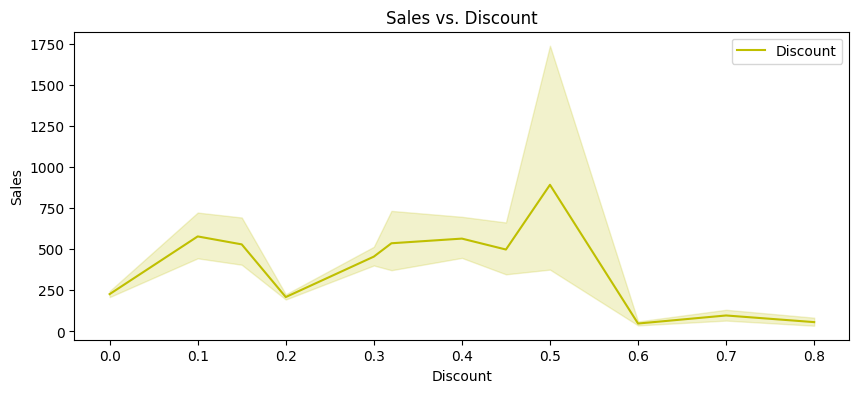

In [105]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Discount', y='Sales', data=df, color='y', label='Discount')
plt.legend()
plt.title('Sales vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

## Discount w.r.t Sub-Category

### Conclusion :

- The highest percentage of discounts were offered on products like Machines, Binders, and Tables.

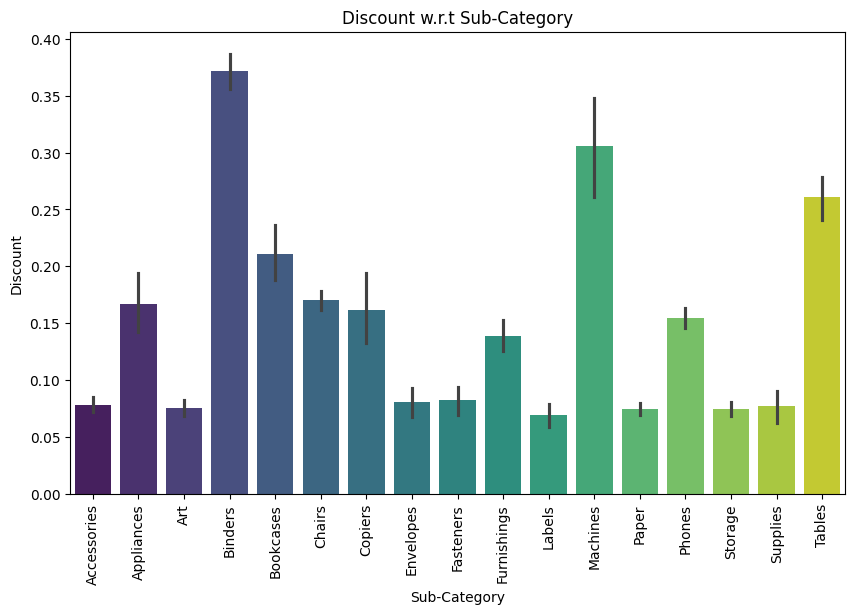

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Discount', data=df, hue='Sub-Category', palette='viridis', legend=False)
plt.title('Discount w.r.t Sub-Category')
plt.xticks(rotation=90)
plt.show()

## Profit w.r.t Sub-Category

### conclusion :

- The highest profit was made on Copiers, primarily because the discount offered was controlled within a range of 0% to 15%.
- This aligns with earlier findings that discounts exceeding 20% tend to lead to losses, reinforcing the effectiveness of keeping discounts within this optimal range.
- The majority of our profit comes from the Technology category, indicating that this segment is a key driver of profitability.
- Although Machines had the highest sales, overall discounts were just above 30%. However, this sub-category did not perform well in terms of profit due to the high discounts offered, highlighting the negative impact of excessive discounting on profitability.

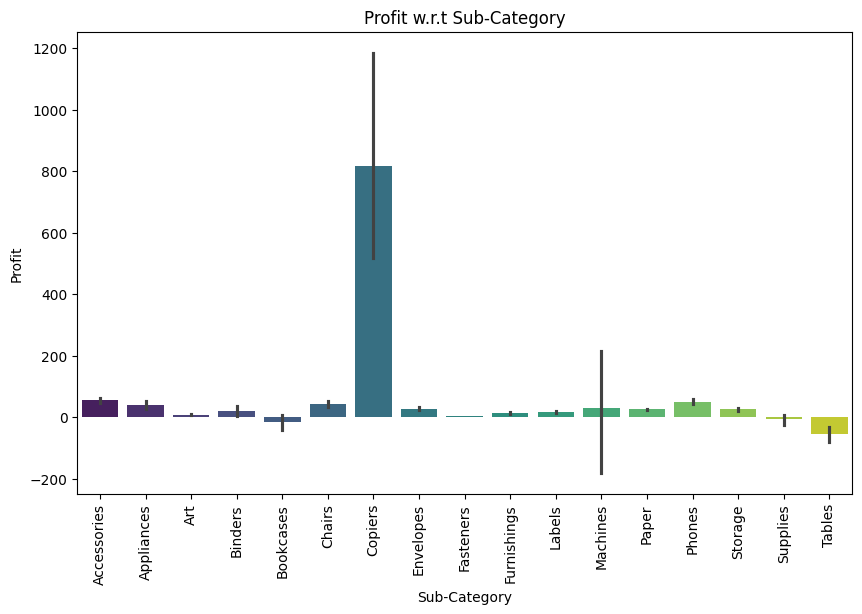

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Profit', data=df, hue='Sub-Category', palette='viridis', legend=False)
plt.title('Profit w.r.t Sub-Category')
plt.xticks(rotation=90)
plt.show()


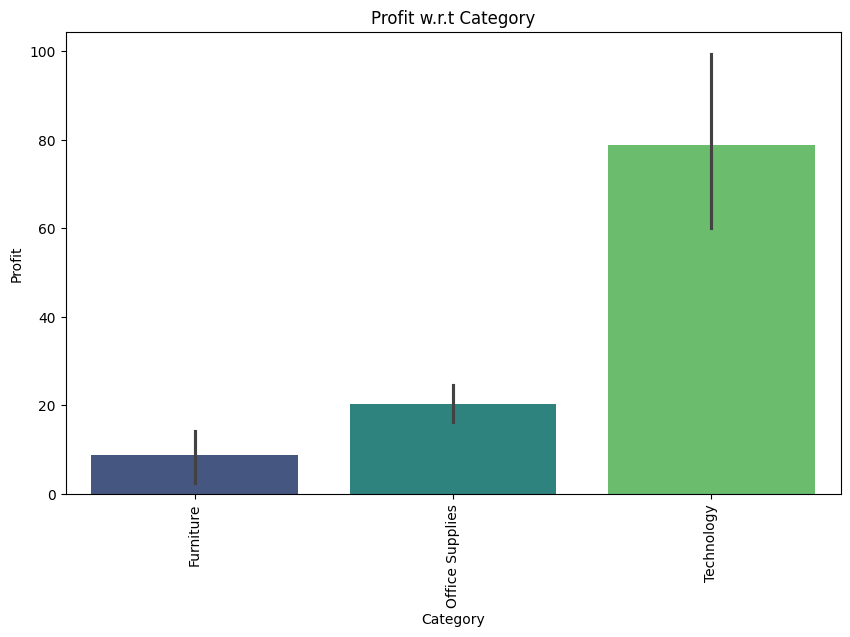

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df,hue='Category', palette='viridis')
plt.title('Profit w.r.t Category')
plt.xticks(rotation=90)
plt.show()


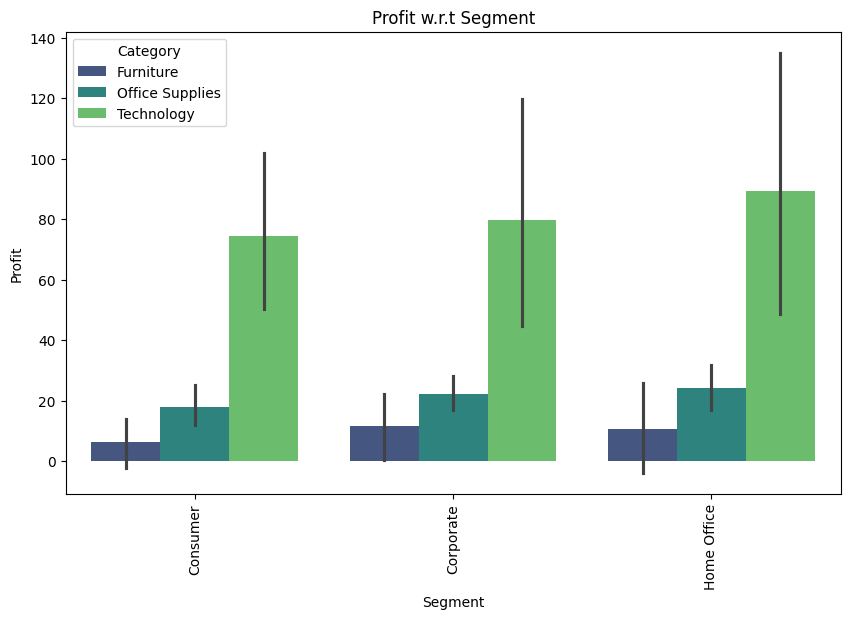

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=df,hue='Category', palette='viridis')
plt.title('Profit w.r.t Segment')
plt.xticks(rotation=90)
plt.show()

## Profit w.r.t Geographical location

### conclusion :

- The West, East, and South regions have performed well overall. At the state level, Vermont has stood out, generating notable profits compared to other states.

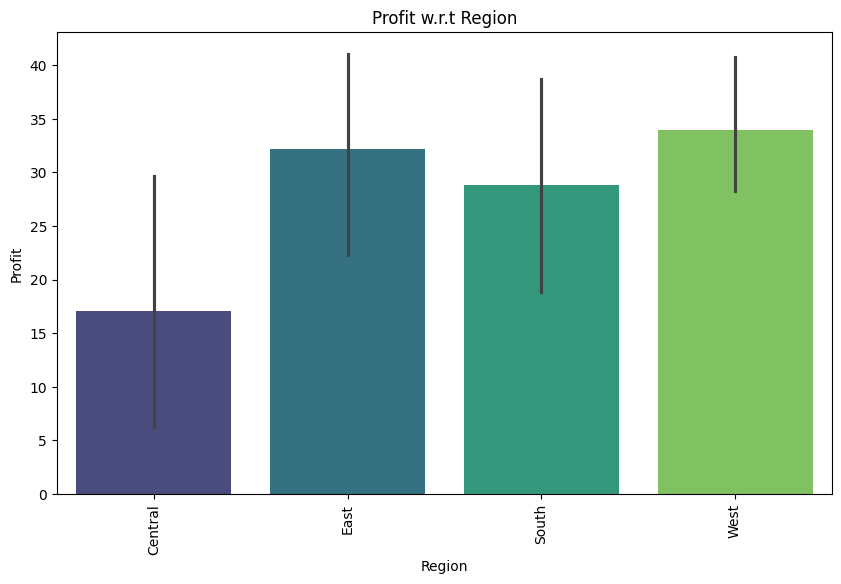

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Profit', data=df,hue='Region', palette='viridis')
plt.title('Profit w.r.t Region')
plt.xticks(rotation=90)
plt.show()

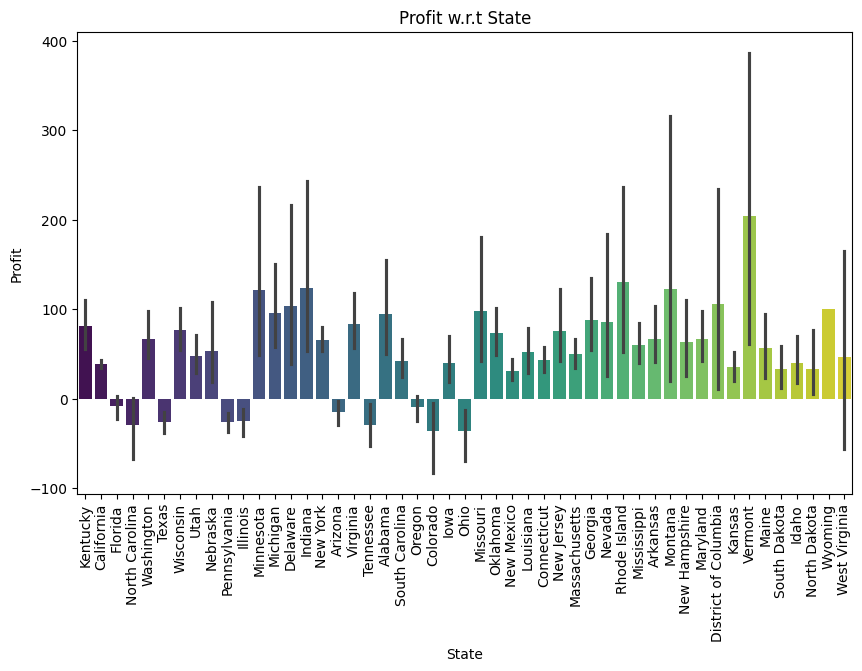

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Profit', data=df,hue='State', palette='viridis')
plt.title('Profit w.r.t State')
plt.xticks(rotation=90)
plt.show()

## Ship Mode vs Segment

### Conclusion :

- Standard Class dominates with around 60% usage across all segments, indicating a preference for economical shipping.
- First Class is chosen by 15-16% of customers, showing moderate demand for faster delivery.
- Same Day shipping is least popular, with only 3-6% usage.
- Second Class is more preferred than First Class, balancing cost and speed.

In [112]:
pd.crosstab(df['Ship Mode'],df['Segment'],normalize='columns')*100

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,14.817673,16.086235,15.964025
Same Day,6.116149,3.781095,6.239460
Second Class,19.660428,20.165837,17.762788
Standard Class,59.405750,59.966833,60.033727


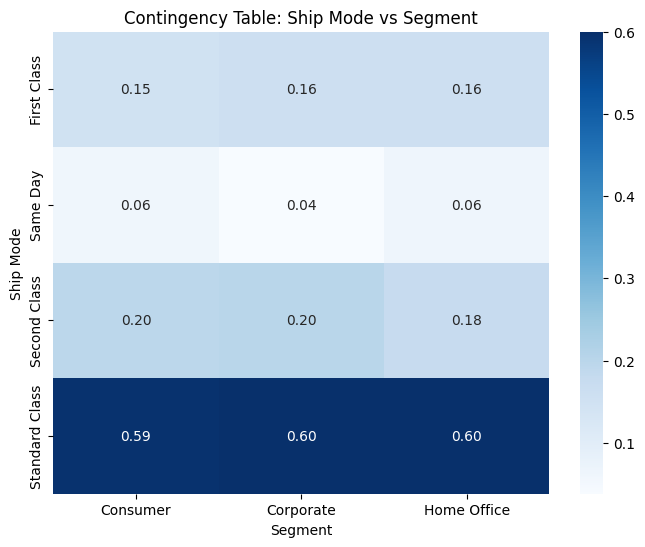

In [113]:
contingency_table = pd.crosstab(df['Ship Mode'], df['Segment'], normalize='columns')

plt.figure(figsize=(8,6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='.2f')
plt.title('Contingency Table: Ship Mode vs Segment')
plt.xlabel('Segment')
plt.ylabel('Ship Mode')
plt.show()

In [114]:
pd.crosstab(df['Ship Mode'],df['Region'],normalize='columns')*100

Region,Central,East,South,West
Ship Mode,,,,
First Class,12.850367,17.223199,14.444444,16.129032
Same Day,5.174644,5.448155,5.123457,5.762606
Second Class,20.008624,18.629174,20.308642,19.417476
Standard Class,61.966365,58.699473,60.123457,58.690886


In [115]:
pd.crosstab(df['Segment'],df['Region'],normalize='columns')*100

Region,Central,East,South,West
Segment,,,,
Consumer,52.177663,51.599297,51.728395,52.207955
Corporate,28.934886,30.826011,31.481481,29.971813
Home Office,18.887451,17.574692,16.790123,17.820232


In [116]:
pd.crosstab(df['Region'],df['Category'],normalize='columns')*100

Category,Furniture,Office Supplies,Technology
Region,,,
Central,22.662890,23.602794,22.739578
East,28.328612,28.443114,28.965891
South,15.675165,16.550233,15.863563
West,33.333333,31.403859,32.430969


In [117]:
pd.crosstab(df['Sub-Category'],df['Region'],normalize='columns')*100

Region,Central,East,South,West
Sub-Category,,,,
Accessories,7.891332,7.240773,7.901235,8.080175
Appliances,5.304010,4.428822,5.000000,4.259317
Art,7.589478,8.014060,8.765432,7.798309
Binders,15.739543,15.465729,15.185185,14.751018
Bookcases,2.156102,2.460457,1.728395,2.505481
Chairs,6.597671,5.869947,5.432099,6.482931
Copiers,0.689953,0.702988,0.432099,0.782963
Envelopes,2.544200,2.601054,3.333333,2.098340
Fasteners,2.371712,2.144112,1.790123,2.254933


### conclusions :

- Standard Class Dominance: Standard Class shipping is the most preferred method across all regions, accounting for the majority of shipping choices, particularly in the Central region.


- Consumer Segment Strength: The Consumer segment consistently represents over half of total sales in all regions, indicating a strong retail market for individual buyers.


- Technology Category Leadership: Technology products show the highest sales in the East region, reflecting a significant demand for tech-related items.


- High Demand for Paper: The Paper sub-category ranks highest in sales across all regions, emphasizing its essential role in office supplies.


- Variability in Profitability: The South region, while showing balanced sales across categories, has the lowest overall averages, indicating opportunities for growth and targeted marketing.


- Regional Preferences: Notable differences in product preferences exist among regions, such as the West’s higher sales in Furniture and Accessories, suggesting that regional marketing strategies may enhance sales effectiveness.

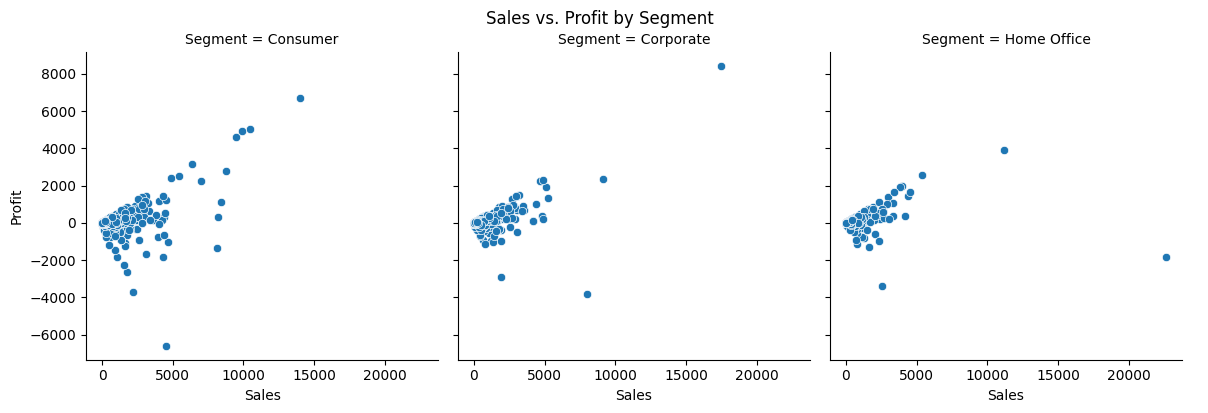

In [118]:
g = sns.FacetGrid(df, col='Segment', height=4, aspect=1)
g.map(sns.scatterplot, 'Sales', 'Profit')
g.add_legend()
plt.suptitle('Sales vs. Profit by Segment', y=1.02)
plt.show()



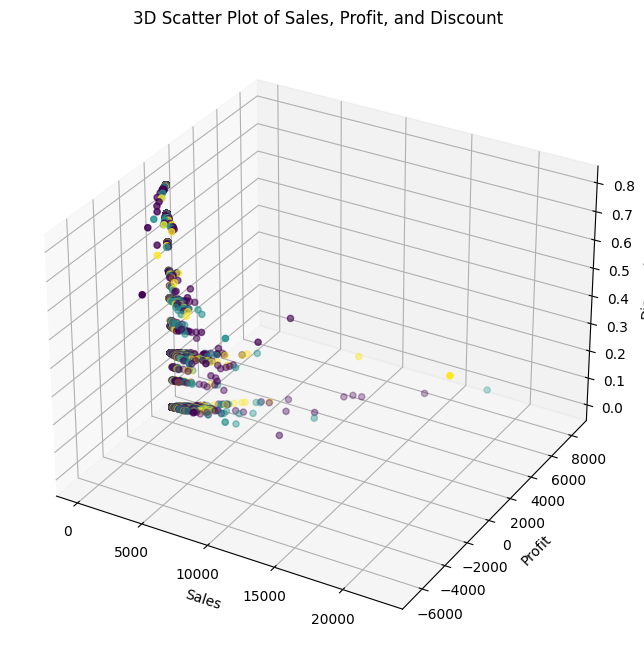

In [119]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Sales'], df['Profit'], df['Discount'], c=df['Segment'].astype('category').cat.codes)
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Discount')
plt.title('3D Scatter Plot of Sales, Profit, and Discount')
plt.show()


### Conclusion :

Low Discounts (0 - 0.2):

- Higher sales and profits are concentrated at lower discount levels.
- The majority of data points with positive profit and higher sales fall in this range.

Higher Discounts (0.5 - 0.8):

- As discounts increase, profit generally decreases, and some points even indicate negative profit.
- Higher discounts don't always lead to higher sales or profit.

Sales Distribution:

- Most sales are clustered below 10,000, with few points beyond this range.
- High sales with lower discount tend to generate more positive profit.

The analysis suggests that lower discounts yield better profits, while higher discounts may harm profitability despite sales increases.

## K-Means Clustering Model for Customer Segmentation

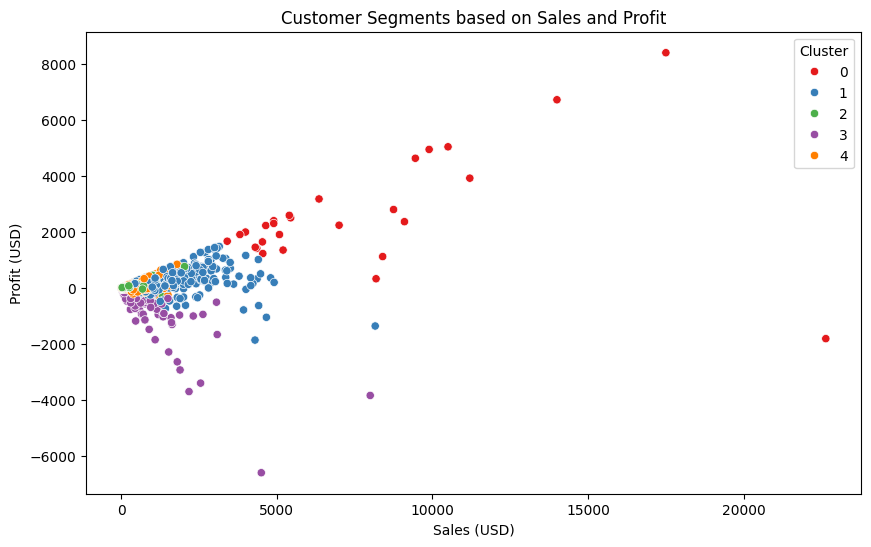

In [120]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Defining numerical and categorical features
numerical_features = ['Sales', 'Quantity', 'Discount', 'Profit']
categorical_features = ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# K-Means Pipeline
kmeans_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

# Fit the model
kmeans_pipeline.fit(df)

# Assign cluster labels
df['Cluster'] = kmeans_pipeline.named_steps['kmeans'].labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments based on Sales and Profit')
plt.xlabel('Sales (USD)')
plt.ylabel('Profit (USD)')
plt.show()

## Cluster Plot of Sales vs Profit

### Cluster 0 (Red): High Sales, High Profit

- Description: This cluster includes customers who generate high sales with corresponding high profits, making them highly valuable for the business.
- Action: Retaining these customers should be a priority through loyalty programs, personalized discounts, or premium services. They represent the most profitable transactions, often making bulk or high-margin purchases.

### Cluster 1 (Blue): Moderate Sales, Positive Profit

- Description: Customers in this cluster have moderate sales and positive profits, representing a stable and profitable segment.
- Action: These customers are important for the company's bottom line. Cross-selling and upselling strategies, as well as improved customer engagement, could potentially move them toward higher sales while maintaining profitability.

### Cluster 2 (Green): Low Sales, Positive Profit

- Description: This cluster shows low sales but still maintains a positive profit. These customers are likely purchasing niche or high-margin products despite their lower volume.
- Action: Focus on converting these customers into more frequent buyers by offering exclusive deals or tailored recommendations to increase both sales and profits.

### Cluster 3 (Purple): Low Sales, Negative Profit

- Description: These customers represent low sales and negative profits, indicating loss-making transactions. This could be due to over-discounting or selling low-margin products.
- Action: Re-evaluate pricing strategies or product offerings to this segment to either make these transactions profitable or minimize efforts on these customers to avoid further losses.

### Cluster 4 (Orange): High Sales, Low to Negative Profit

- Description: Despite generating high sales, these customers result in low to negative profit. This cluster is a critical outlier because high revenue does not translate to profit, potentially due to heavy discounts, low-margin products, or high operating costs.
- Action: Investigate this segment thoroughly and consider adjusting pricing models, reducing discounts, or optimizing product offerings to turn these sales into profits.

### General Observation:
- The overall trend shows a positive correlation between sales and profit, but Cluster 4 (Orange) highlights that high sales don't always lead to profitability. This underscores the importance of focusing not just on increasing sales but ensuring that the sales are profitable through proper pricing and cost-management strategies.

# Final Conclusion

## Problem Statement:

- The project's goal was to help the company improve its profitability by analyzing sales data to uncover key factors influencing sales performance, shipping efficiency, and customer satisfaction. This was done to optimize operations and marketing efforts.

## Objective:

- We aimed to explore sales trends, understand the relationship between sales, product categories, and customer segments, and provide actionable recommendations to boost profitability.

## Key Deliverables Solved:

- Data Cleaning and Preparation: We handled missing data and standardized formats for analysis.
  
- Exploratory Data Analysis (EDA): We identified trends across regions, product categories, and customer segments. Key insights include:
    - The West region performed best in terms of sales.
    - Technology products had the highest profit margin, while furniture underperformed.
    - Corporate customer segments were the most profitable.

      
- Profitability and Shipping Mode Analysis: We identified which shipping methods were most cost-effective, recommending a focus on standard shipping for low-cost efficiency.

  
- Actionable Insights:
    - Focus on underperforming categories like Furniture in regions like the South.
    - Optimize shipping and delivery to reduce costs.